In [ ]:
!nvidia-smi

Sat Oct 31 15:25:16 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    26W / 250W |      3MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* @file 深度學習基礎/4_classification_DNN_model.ipynb
  * @brief 4_classification_DNN_model

  * 此份程式碼是以教學為目的，附有完整的架構解說。

  * @author 人工智慧科技基金會 AI 工程師 - 康文瑋
  * Email: run963741@aif.tw
  * Resume: https://www.cakeresume.com/run963741

  * 最後更新日期: 2020/11/26

# 載入函數

In [ ]:
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib

os.chdir('/content/drive/Shared drives/類技術班教材/標準版/ 深度學習基礎/DL_part1')

# 線性可分 (Linear Separability)

In [ ]:
def linear_model(rseed=222, n_samples=30):
    " Generate data according to a linear model"
    np.random.seed(rseed)

    data = np.random.normal(-1, 1, (n_samples, 2))
    data[:n_samples // 2] -= 2
    data[n_samples // 2:] += 2

    labels = np.ones(n_samples)
    labels[:n_samples // 2] = 0

    return data, labels

### 產生線性可分資料集

In [ ]:
n_samples = 600
linear_X, linear_y = linear_model(n_samples = n_samples)

In [ ]:
print('linear_X: ', linear_X[:5])
print('linear_y: ', linear_y[:5])

linear_X:  [[-1.03657498 -2.72423031]
 [-2.5413418  -1.99873534]
 [-3.76383531 -2.27807234]
 [-3.90546956 -1.99812661]
 [-3.52074247 -2.69104713]]
linear_y:  [0. 0. 0. 0. 0.]


### 資料視覺化

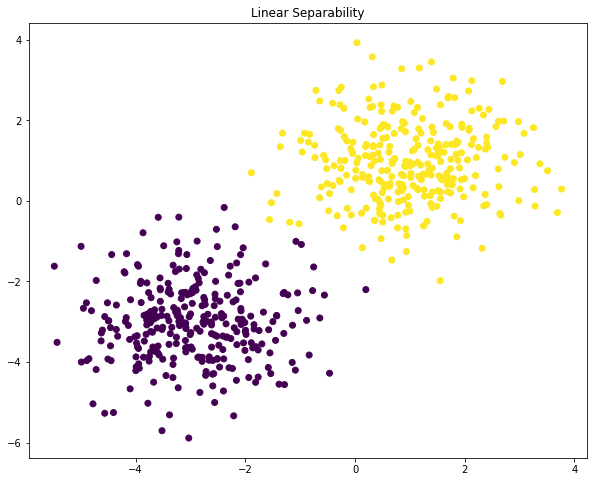

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(linear_X[:,0], linear_X[:,1], c = linear_y)
plt.title('Linear Separability')
plt.show()

## 切割訓練集 (Training set) 以及測試集 (testing set)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(linear_X, linear_y, test_size=0.2, shuffle=True)

print('Training data size: ', X_train.shape)
print('Testing data size: ', X_test.shape)

Training data size:  (480, 2)
Testing data size:  (120, 2)


## 建立模型

$$
f(x)=\sigma(x_1w_1+x_2w_2+b)
$$

In [ ]:
input = tf.keras.layers.Input(shape=(2,), name='Input_layer')
dense = tf.keras.layers.Dense(1, activation='sigmoid', use_bias=True, name='dense1')

output = dense(input)

model = tf.keras.Model(input, output, name='linear_separability')

model.summary()

Model: "linear_separability"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (InputLayer)     [(None, 2)]               0         
_________________________________________________________________
dense1 (Dense)               (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


## 訓練模型

Tensorflow 最常使用來編譯模型的方式是透過 `.compile` 來指定損失函數 (loss function) 、優化器 (optimizer)、評估指標 (metrics) 以及 callbacks。

分類任務參數：
* `loss`: 分類任務最常使用的損失函數為 `cross_entropy`，若是二元分類，則使用 `binary_cross_entropy`；若是多元分類，則使用 `categorical_crossentropy` 或是 `sparse_categorical_crossentropy` (這兩種差別在於標籤是否有做 `One-hot encoding`，有做的話就使用 `categorical_crossentropy`，反之就使用 `sparse_categorical_crossentropy`)。

* `optimizer`: 優化器決定參數更新的方式，目前最常使用的優化器為 `SGD, RMSprop, Adam`，近期研究也有新的優化器，例如 `RangerLars`。

In [ ]:
sgd = tf.keras.optimizers.SGD(learning_rate=1e-2, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
# 訓練模型
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32)

Epoch 1/200
15/15 [==============================] - 0s 11ms/step - loss: 0.6491 - accuracy: 0.6750 - val_loss: 0.2613 - val_accuracy: 0.9167
Epoch 2/200
15/15 [==============================] - 0s 3ms/step - loss: 0.2124 - accuracy: 0.9125 - val_loss: 0.1474 - val_accuracy: 0.9833
Epoch 3/200
15/15 [==============================] - 0s 3ms/step - loss: 0.1471 - accuracy: 0.9375 - val_loss: 0.1174 - val_accuracy: 0.9750
Epoch 4/200
15/15 [==============================] - 0s 3ms/step - loss: 0.1215 - accuracy: 0.9479 - val_loss: 0.1019 - val_accuracy: 0.9750
Epoch 5/200
15/15 [==============================] - 0s 3ms/step - loss: 0.1063 - accuracy: 0.9625 - val_loss: 0.0915 - val_accuracy: 0.9750
Epoch 6/200
15/15 [==============================] - 0s 3ms/step - loss: 0.0955 - accuracy: 0.9708 - val_loss: 0.0835 - val_accuracy: 0.9750
Epoch 7/200
15/15 [==============================] - 0s 3ms/step - loss: 0.0865 - accuracy: 0.9750 - val_loss: 0.0775 - val_accuracy: 0.9750
Epoch 8/200


## 評估模型

分類任務最常使用的評估指標:

* `Confusion matrix`: 混淆矩陣，詳細顯示模型預測錯誤的類別。
* `Precision`: 表示模型預測為某類別中，真正屬於某類別的比例，由混淆矩陣推導而來。
* `Recall`: 表示所有資料為某類，被模型預測為某類的比例，由混淆矩陣推導而來。

In [ ]:
y_pred = model.predict(X_test)
y_pred_class = np.where(y_pred >= 0.5, 1, 0)

# 模型預測，每個數值表示每筆資料的預測概率，通常用 0.5 當成閥值，小於 0.5 屬於第一類；大於 0.5 屬於第二類
print('Model predicted probabilities: ', y_pred[:5])
print('Model predicted classes: ', y_pred_class[:5])

Model predicted probabilities:  [[0.99994314]
 [0.89097434]
 [0.9960443 ]
 [0.9547653 ]
 [0.99994266]]
Model predicted classes:  [[1]
 [1]
 [1]
 [1]
 [1]]


### 混淆矩陣

In [ ]:
cnfm = confusion_matrix(y_pred=y_pred_class, y_true=y_test)
cnfm = pd.DataFrame(cnfm, columns=['Pred_0', 'Pred_1'], index=['Actual_0', 'Actual_1'])
cnfm

,Pred_0,Pred_1
Actual_0,50,0
Actual_1,0,70


### Precision, Recall

In [ ]:
report =  classification_report(y_pred=y_pred_class, y_true=y_test)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       1.00      1.00      1.00        70

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



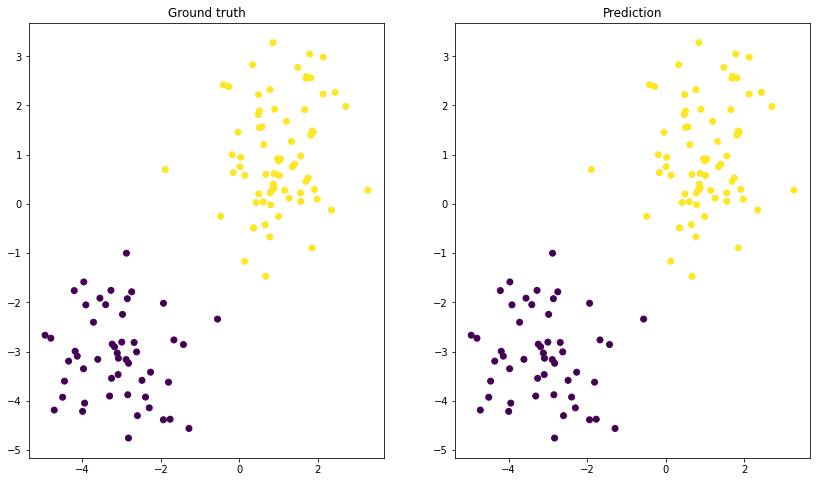

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.scatter(X_test[:,0], X_test[:,1], c = y_test)
plt.title('Ground truth')

plt.subplot(1,2,2)
plt.scatter(X_test[:,0], X_test[:,1], c = [t[0] for t in y_pred_class])
plt.title('Prediction')
plt.show()

# 線性不可分 (Linear Non-separability)

線性不可分的意思是說，無法使用一條線、一個平面或是一個高維度的面將資料完美的切開，當遇到這種情形時，就必須採用 **投影至高維** 的方式來嘗試是否可以在高維度將資料切開。

In [ ]:
def nonlinear_model(rseed=42, n_samples=300):
    radius = 40 * np.random.random(n_samples)
    far_pts = radius > 20
    radius[far_pts] *= 1.2
    radius[~far_pts] *= 1.1

    theta = np.random.random(n_samples) * np.pi * 2

    data = np.empty((n_samples, 2))
    data[:, 0] = radius * np.cos(theta)
    data[:, 1] = radius * np.sin(theta)

    labels = np.ones(n_samples)
    labels[far_pts] = 0

    return data, labels

### 產生線性不可分資料集

In [ ]:
n_samples = 1000
nonlinear_X, nonlinear_y = nonlinear_model(n_samples=n_samples)

In [ ]:
print('nonlinear_X: ', nonlinear_X[:5])
print('nonlinear_y: ', nonlinear_y[:5])

nonlinear_X:  [[ 39.83626734  16.10364203]
 [-16.19574976  -2.4591906 ]
 [  8.47636227  -5.11445965]
 [  1.45961705 -31.96404661]
 [  2.33503842 -19.92834296]]
nonlinear_y:  [0. 1. 1. 0. 1.]


### 資料視覺化

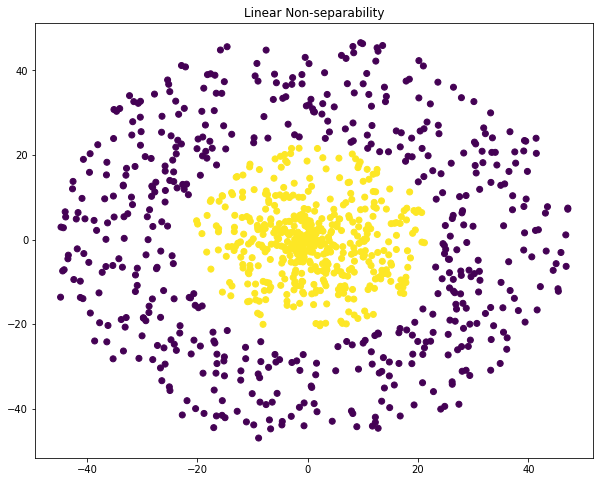

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(nonlinear_X[:,0], nonlinear_X[:,1], c = nonlinear_y)
plt.title('Linear Non-separability')
plt.show()

## 切割訓練集 (Training set) 以及測試集 (testing set)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(nonlinear_X, nonlinear_y, test_size=0.2, shuffle=True)

print('Training data size: ', X_train.shape)
print('Testing data size: ', X_test.shape)

Training data size:  (800, 2)
Testing data size:  (200, 2)


## 建立模型



從上面的資料集來看，沒辦法使用一條線將兩群完整的分開，這時就需要換一個作法，將這些點投影到高維空間，以我們的例子來說，就是將二維投影至三維，如下影片。

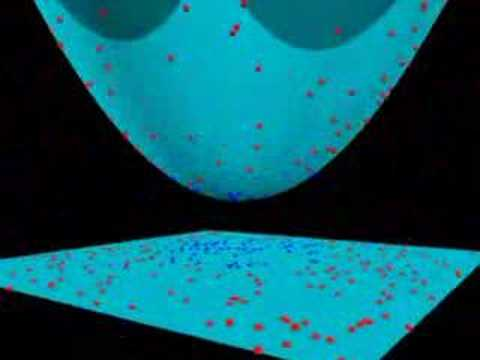

In [ ]:
from IPython.display import YouTubeVideo
# a talk about IPython at Sage Days at U. Washington, Seattle.
# Video credit: William Stein.
YouTubeVideo('3liCbRZPrZA')

In [ ]:
input = tf.keras.layers.Input(shape=(2,), name='Input_layer')
dense1 = tf.keras.layers.Dense(3, activation='relu', use_bias=True, name='dense1')
dense2 = tf.keras.layers.Dense(1, activation='sigmoid', use_bias=True, name='dense2')

dense1_output = dense1(input)
output = dense2(dense1_output)

model = tf.keras.Model(input, output, name='linear_nonseparability')

model.summary()

Model: "linear_nonseparability"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (InputLayer)     [(None, 2)]               0         
_________________________________________________________________
dense1 (Dense)               (None, 3)                 9         
_________________________________________________________________
dense2 (Dense)               (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


## 訓練模型


In [ ]:
sgd = tf.keras.optimizers.SGD(learning_rate=1e-2, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
# 訓練模型
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32)

Epoch 1/200
25/25 [==============================] - 0s 8ms/step - loss: 1.9372 - accuracy: 0.5525 - val_loss: 0.7397 - val_accuracy: 0.5700
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6139 - accuracy: 0.6438 - val_loss: 0.5654 - val_accuracy: 0.6650
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 0.5299 - accuracy: 0.7050 - val_loss: 0.5192 - val_accuracy: 0.7100
Epoch 4/200
25/25 [==============================] - 0s 3ms/step - loss: 0.5074 - accuracy: 0.7350 - val_loss: 0.4920 - val_accuracy: 0.7750
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 0.4355 - accuracy: 0.8163 - val_loss: 0.3861 - val_accuracy: 0.8850
Epoch 6/200
25/25 [==============================] - 0s 3ms/step - loss: 0.3733 - accuracy: 0.8300 - val_loss: 0.3372 - val_accuracy: 0.9150
Epoch 7/200
25/25 [==============================] - 0s 3ms/step - loss: 0.3162 - accuracy: 0.8888 - val_loss: 0.3146 - val_accuracy: 0.9450
Epoch 8/200
2

## 評估模型

分類任務最常使用的評估指標:

* `Confusion matrix`: 混淆矩陣，詳細顯示模型預測錯誤的類別。
* `Precision`: 表示模型預測為某類別中，真正屬於某類別的比例，由混淆矩陣推導而來。
* `Recall`: 表示所有資料為某類，被模型預測為某類的比例，由混淆矩陣推導而來。

In [ ]:
y_pred = model.predict(X_test)
y_pred_class = np.where(y_pred >= 0.5, 1, 0)

# 模型預測，每個數值表示每筆資料的預測概率，通常用 0.5 當成閥值，小於 0.5 屬於第一類；大於 0.5 屬於第二類
print('Model predicted probabilities: ', y_pred[:5])
print('Model predicted classes: ', y_pred_class[:5])

Model predicted probabilities:  [[9.3284339e-01]
 [6.4956322e-03]
 [4.3542401e-05]
 [9.9552035e-01]
 [9.1069803e-04]]
Model predicted classes:  [[1]
 [0]
 [0]
 [1]
 [0]]


### 混淆矩陣

In [ ]:
cnfm = confusion_matrix(y_pred=y_pred_class, y_true=y_test)
cnfm = pd.DataFrame(cnfm, columns=['Pred_0', 'Pred_1'], index=['Actual_0', 'Actual_1'])
cnfm

,Pred_0,Pred_1
Actual_0,98,1
Actual_1,3,98


### Precision, Recall

In [ ]:
report =  classification_report(y_pred=y_pred_class, y_true=y_test)
print(report)

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        99
         1.0       0.99      0.97      0.98       101

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



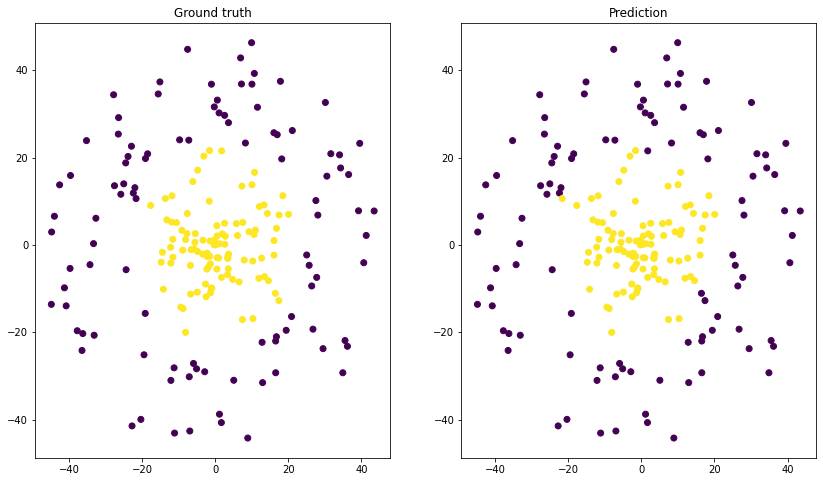

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.scatter(X_test[:,0], X_test[:,1], c = y_test)
plt.title('Ground truth')

plt.subplot(1,2,2)
plt.scatter(X_test[:,0], X_test[:,1], c = [t[0] for t in y_pred_class])
plt.title('Prediction')
plt.show()

## 觀察模型將二維的資料投影至三維資料中的樣子

### 查看訓練參數

使用 `.get_weights()` 可以拿取模型所有的參數

In [ ]:
w1_pred = model.get_weights()[0]
b1_pred = model.get_weights()[1]

print('Layer1 w1_pred shape: ', w1_pred.shape)
print('Layer1 b1_pred shape: ', b1_pred.shape)

Layer1 w1_pred shape:  (2, 3)
Layer1 b1_pred shape:  (3,)


### Projection

計算第一層的輸出，來觀察投影至三維之後的樣子。

擬第一層的矩陣運算，分為兩步驟：
1. 將資料 `X_test` 和權重 `w1_pred` 進行矩陣相乘，然後加上 bias `b1_pred`。
2. 通過激發函數 `relu`。

In [ ]:
layer1_output = np.maximum(np.matmul(X_test, w1_pred) + b1_pred, 0)

print('Input layer shape: ', X_test.shape)
print('Layer1 output shape: ', layer1_output.shape)

Input layer shape:  (200, 2)
Layer1 output shape:  (200, 3)


下圖為模型在第一層的三維輸出，可以發現當模型將二維資料透過線性轉換至三維後，再通過激發函數，就能夠將資料完美的切開。

In [ ]:
import plotly.express as px

data = np.concatenate([layer1_output, y_pred_class], axis=1)
data = pd.DataFrame(data, columns=['x', 'y', 'z', 'pred'])

fig = px.scatter_3d(data, x='x', y='y', z='z', color='pred')
fig.show()

## Prediction boundary

接下來我們來觀察模型的預測邊界，透過這個方式，可以了解模型在判斷資料時的依據，到底在哪個地方判斷每個類別。

In [ ]:
# 產生網格資料
x1=np.linspace(-50,50,100)
x2=np.linspace(-50,50,100)

x1, x2 = np.meshgrid(x1, x2)
plot_data = np.array(list(zip(x1.flatten(), x2.flatten())))

print('Plot data shape: ', plot_data.shape)

Plot data shape:  (10000, 2)


In [ ]:
# 將網格上每個點都進行預測

plot_y = model.predict(plot_data)
plot_y_class = np.where(plot_y >= 0.5, 1, 0)
plot_y_class = [t[0] for t in plot_y_class]

### Plot boundary

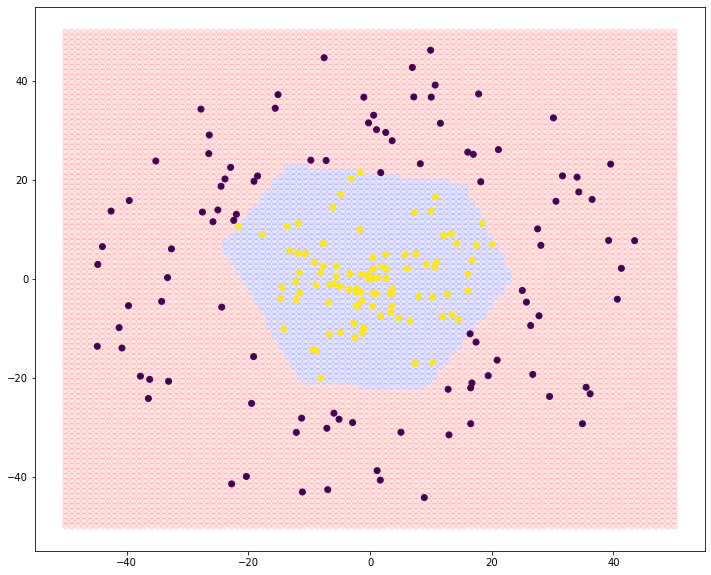

In [ ]:
plt.figure(figsize=(12,10))
colors = ['red', 'blue']
# 第一個 scatter 畫出網格點, 顏色分別為紅色和藍色
plt.scatter(x1, x2, c = plot_y_class, alpha=0.1, cmap=matplotlib.colors.ListedColormap(colors))

# 第二個 scatter 畫出測試集 X_test 的預測類別
plt.scatter(X_test[:,0], X_test[:,1], c = [t[0] for t in y_pred_class])
plt.show()

# 動手試試看

接下來請大家嚐試使用另一種線性不可分的資料集來分類。

In [ ]:
def Spirals_model(rseed=42, n_samples=300):
  theta = np.sqrt(np.random.rand(n_samples))*2*np.pi 

  r_a = 2*theta + np.pi
  data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
  x_a = data_a + np.random.randn(n_samples,2)

  r_b = -2*theta - np.pi
  data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
  x_b = data_b + np.random.randn(n_samples,2)

  res_a = np.append(x_a, np.zeros((n_samples,1)), axis=1)
  res_b = np.append(x_b, np.ones((n_samples,1)), axis=1)

  res = np.append(res_a, res_b, axis=0)
  return res[:,0:2], res[:,2]

### 產生線性不可分資料集

In [ ]:
n_samples = 500
spiral_X, spiral_y = Spirals_model(n_samples=n_samples)

In [ ]:
print('spiral_X: ', spiral_X[:5])
print('spiral_y: ', spiral_y[:5])

spiral_X:  [[ -6.15617436   5.55268403]
 [  5.89778866 -11.49298773]
 [ 14.55551651  -6.26357357]
 [ 12.57684571  -4.5362898 ]
 [  5.28066973   1.06607575]]
spiral_y:  [0. 0. 0. 0. 0.]


### 資料視覺化

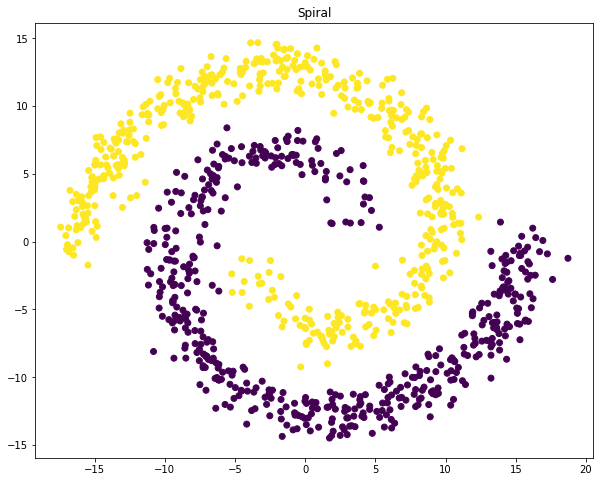

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(spiral_X[:,0], spiral_X[:,1], c = spiral_y)
plt.title('Spiral')
plt.show()

## 切割訓練集 (Training set) 以及測試集 (testing set)

請決定 test_size 比例

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(spiral_X, spiral_y, test_size=, shuffle=True)

print('Training data size: ', X_train.shape)
print('Testing data size: ', X_test.shape)

## 建立模型



In [ ]:
input = tf.keras.layers.Input(shape=(2,), name='Input_layer')
dense1 = tf.keras.layers.Dense(8, activation='relu', use_bias=True, name='dense1')
dense2 = tf.keras.layers.Dense(4, activation='relu', use_bias=True, name='dense2')
dense3 = tf.keras.layers.Dense(1, activation='sigmoid', use_bias=True, name='dense3')

dense1_output = dense1(input)
dense2_output = dense2(dense1_output)
output = dense3(dense2_output)

model = tf.keras.Model(input, output, name='linear_nonseparability')

model.summary()

## 訓練模型

* `optimizer`: 請使用 `sgd`, 其中 `momentum` 請設定 `0.9`
* `loss`: 請使用 `binary_crossentropy`
* `metrics`: 請使用 `accuracy`
* `epochs`: 請設定為 `200`
* `batch_size`: 請設定為 `32`

In [ ]:
sgd =
model.compile(loss=, optimizer=, metrics=[])

In [ ]:
# 訓練模型
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=, batch_size=)

## 評估模型

* 請預測 `X_test` 
* 預測閥值請使用 `0.5`

In [ ]:
y_pred = model.predict()
y_pred_class = np.where(y_pred >= , 1, 0)

# 模型預測，每個數值表示每筆資料的預測概率，通常用 0.5 當成閥值，小於 0.5 屬於第一類；大於 0.5 屬於第二類
print('Model predicted probabilities: ', y_pred[:5])
print('Model predicted classes: ', y_pred_class[:5])

### 混淆矩陣

In [ ]:
cnfm = confusion_matrix(y_pred=y_pred_class, y_true=y_test)
cnfm = pd.DataFrame(cnfm, columns=['Pred_0', 'Pred_1'], index=['Actual_0', 'Actual_1'])
cnfm

### Precision, Recall

In [ ]:
report =  classification_report(y_pred=y_pred_class, y_true=y_test)
print(report)

## Prediction boundary

接下來我們來觀察模型的預測邊界，透過這個方式，可以了解模型在判斷資料時的依據，到底在哪個地方判斷每個類別。

In [ ]:
# 產生網格資料
x1=np.linspace(-20,20,100)
x2=np.linspace(-20,20,100)

x1, x2 = np.meshgrid(x1, x2)
plot_data = np.array(list(zip(x1.flatten(), x2.flatten())))

print('Plot data shape: ', plot_data.shape)

In [ ]:
# 將網格上每個點都進行預測

plot_y = model.predict(plot_data)
plot_y_class = np.where(plot_y >= 0.5, 1, 0)
plot_y_class = [t[0] for t in plot_y_class]

### Plot boundary

In [ ]:
plt.figure(figsize=(12,10))
colors = ['red', 'blue']
# 第一個 scatter 畫出網格點, 顏色分別為紅色和藍色
plt.scatter(x1, x2, c = plot_y_class, alpha=0.1, cmap=matplotlib.colors.ListedColormap(colors))

# 第二個 scatter 畫出測試集 X_test 的預測類別
plt.scatter(X_test[:,0], X_test[:,1], c = [t[0] for t in y_pred_class])
plt.show()